collect S&P 500, Nasdaq, Bitcoin daily returns

In [1]:
import yfinance as yf
import pandas as pd

# 定义要获取数据的资产
assets = {
    "S&P 500": "^GSPC",
    "Nasdaq": "^IXIC",
    "Bitcoin": "BTC-USD"
}

# 定义时间范围
start_date = "2021-01-01"
end_date = "2024-04-07"

# 创建一个空的DataFrame用于存储结果
three_data = pd.DataFrame()

# 循环遍历资产，获取每个资产的历史价格数据
for name, symbol in assets.items():
    asset_data = yf.download(symbol, start=start_date, end=end_date)
    # 只保留收盘价格，并重命名列以反映资产名称
    asset_data = asset_data[["Close"]].rename(columns={"Close": name})
    # 将数据合并到结果DataFrame中
    if three_data.empty:
        three_data = asset_data
    else:
        three_data = three_data.join(asset_data, how="outer")

# 检查前几行数据
print(three_data.head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                S&P 500        Nasdaq       Bitcoin
Date                                               
2021-01-01          NaN           NaN  29374.152344
2021-01-02          NaN           NaN  32127.267578
2021-01-03          NaN           NaN  32782.023438
2021-01-04  3700.649902  12698.450195  31971.914062
2021-01-05  3726.860107  12818.959961  33992.429688


In [2]:
# 计算每个资产每天的收益率
three_data_returns = three_data.pct_change()

# 检查前几行数据
print(three_data_returns.head())

             S&P 500   Nasdaq   Bitcoin
Date                                   
2021-01-01       NaN      NaN       NaN
2021-01-02       NaN      NaN  0.093726
2021-01-03       NaN      NaN  0.020380
2021-01-04       NaN      NaN -0.024712
2021-01-05  0.007083  0.00949  0.063197


collect gold daily returns

In [3]:
gold_yield = pd.read_excel(r'C:\Users\ljx\Desktop\XAU_USD Historical Data.xlsx', usecols=['Date', 'Gold'])
gold_yield.columns = ['Date', 'Gold']

# 确保日期列的数据类型是datetime，以便正确合并
gold_yield['Date'] = pd.to_datetime(gold_yield['Date'], format="%d/%m/%Y")

# 步骤2: 将金价数据合并到资产价格数据中
# 假设assets_data的日期列也是datetime类型，并且列名为'Date'
four_data = pd.merge(three_data_returns, gold_yield, on='Date', how='outer')

# 对合并后的DataFrame按日期排序，确保第一列是时间
four_data = four_data.sort_values(by='Date')

# 检查合并后的数据
print(four_data.head())


        Date   S&P 500   Nasdaq   Bitcoin    Gold
0 2021-01-01       NaN      NaN       NaN  0.0009
1 2021-01-02       NaN      NaN  0.093726     NaN
2 2021-01-03       NaN      NaN  0.020380     NaN
3 2021-01-04       NaN      NaN -0.024712  0.0233
4 2021-01-05  0.007083  0.00949  0.063197  0.0036


get dataset

In [4]:
# 创建一个新的DataFrame，删除包含空值的行
cleaned_data = four_data.dropna(axis=0)

In [5]:
cleaned_data

,Date,S&P 500,Nasdaq,Bitcoin,Gold
4,2021-01-05,0.007083,0.009490,0.063197,0.0036
5,2021-01-06,0.005710,-0.006098,0.083311,-0.0157
6,2021-01-07,0.014847,0.025641,0.069157,-0.0033
7,2021-01-08,0.005492,0.010293,0.036234,-0.0336
10,2021-01-11,-0.006555,-0.012540,-0.072733,-0.0019
...,...,...,...,...,...
1186,2024-04-01,-0.002014,0.001060,-0.022871,0.0081
1187,2024-04-02,-0.007239,-0.009537,-0.061048,0.0132
1188,2024-04-03,0.001091,0.002279,0.008157,0.0084
1189,2024-04-04,-0.012334,-0.014030,0.038315,-0.0042


calculate log returns

In [6]:
import numpy as np

# 将日期列设置为索引
four_data.set_index('Date', inplace=True)

# 计算对数收益率
log_returns = np.log(1 + four_data)

# 重新设置日期列为列
log_returns.reset_index(inplace=True)

# 检查计算后的对数收益率
print(log_returns.head())

        Date   S&P 500    Nasdaq   Bitcoin      Gold
0 2021-01-01       NaN       NaN       NaN  0.000900
1 2021-01-02       NaN       NaN  0.089590       NaN
2 2021-01-03       NaN       NaN  0.020175       NaN
3 2021-01-04       NaN       NaN -0.025022  0.023033
4 2021-01-05  0.007058  0.009445  0.061280  0.003594


get log dataset

In [7]:
# 创建一个新的DataFrame，删除包含空值的行
data = log_returns.dropna(axis=0)

In [8]:
data

,Date,S&P 500,Nasdaq,Bitcoin,Gold
4,2021-01-05,0.007058,0.009445,0.061280,0.003594
5,2021-01-06,0.005694,-0.006117,0.080022,-0.015825
6,2021-01-07,0.014738,0.025318,0.066871,-0.003305
7,2021-01-08,0.005477,0.010240,0.035593,-0.034177
10,2021-01-11,-0.006576,-0.012619,-0.075514,-0.001902
...,...,...,...,...,...
1186,2024-04-01,-0.002016,0.001060,-0.023137,0.008067
1187,2024-04-02,-0.007265,-0.009583,-0.062991,0.013114
1188,2024-04-03,0.001091,0.002276,0.008124,0.008365
1189,2024-04-04,-0.012411,-0.014130,0.037599,-0.004209


get spreadsheet

In [9]:
# 导出为Excel文件
cleaned_data.to_excel('cleaned_data.xlsx', index=False)
data.to_excel('cleaned_log_data.xlsx', index=False)

Descriptive Statistics and JB ADF LM test

In [11]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from scipy.stats import jarque_bera
from statsmodels.stats.diagnostic import het_arch



# 定义描述性统计分析函数
def descriptive_stats_updated(data):
    descr_stats = data.describe().transpose()
    descr_stats['median'] = data.median()
    descr_stats['skew'] = data.skew()
    descr_stats['kurtosis'] = data.kurtosis()
    return descr_stats

# 定义JB检验函数
def jb_test(data):
    jb_stats = pd.DataFrame(columns=["JB_Stat", "p-value"], index=data.columns)
    for col in data.columns:
        jb_stats.loc[col] = jarque_bera(data[col])[:2]
    return jb_stats

# 定义ADF检验函数
def adf_test(data):
    adf_stats = pd.DataFrame(columns=["ADF_Stat", "p-value", "Used Lag", "Number of Observations"], index=data.columns)
    for col in data.columns:
        result = adfuller(data[col])
        adf_stats.loc[col] = [result[0], result[1], result[2], result[3]]
    return adf_stats

# 定义LM检验函数以检测ARCH效应
def lm_test(data, lags=1):
    lm_stats = pd.DataFrame(columns=["LM_Stat", "p-value", "f-stat", "f_p-value"], index=data.columns)
    for col in data.columns:
        lm_result = het_arch(data[col], nlags=lags)
        lm_stats.loc[col] = lm_result
    return lm_stats

# 根据给定日期划分Panel
panel_a = data[(data['Date'] >= "2021-01-05") & (data['Date'] <= "2023-03-10")]
panel_b = data[(data['Date'] > "2023-03-10") & (data['Date'] <= "2023-04-29")]
panel_c = data[(data['Date'] > "2023-04-29") & (data['Date'] <= "2024-04-05")]

# 对每个Panel执行统计分析
panels = {'Panel A': panel_a, 'Panel B': panel_b, 'Panel C': panel_c}
results = {}

for name, panel in panels.items():
    panel_data = panel.drop(columns=['Date'])
    results[name] = {
        'Descriptive Statistics': descriptive_stats_updated(panel_data),
        'JB Test': jb_test(panel_data),
        'ADF Test': adf_test(panel_data),
        'LM Test': lm_test(panel_data, lags=1)  # 使用1期滞后进行LM检验
    }



In [12]:
# 打印Panel A、B、C的所有检验结果
for panel_name, panel_results in results.items():
    print(f"Results for {panel_name}:")
    for test_name, test_result in panel_results.items():
        print(f"\n{test_name}:")
        print(test_result)
    print("\n" + "-"*50 + "\n")


Results for Panel A:

Descriptive Statistics:
         count      mean       std       min       25%       50%       75%  \
S&P 500  569.0  0.000075  0.011905 -0.044199 -0.006694  0.000000  0.007120   
Nasdaq   569.0 -0.000230  0.015915 -0.052970 -0.009343  0.000000  0.009136   
Bitcoin  569.0 -0.000679  0.041145 -0.174053 -0.020688 -0.000516  0.021633   
Gold     569.0 -0.000070  0.008846 -0.034177 -0.004510  0.000500  0.004789   

              max    median      skew  kurtosis  
S&P 500  0.053953  0.000000 -0.181596  1.459259  
Nasdaq   0.070926  0.000000 -0.115758  0.989172  
Bitcoin  0.171821 -0.000516 -0.243134  2.175290  
Gold     0.030917  0.000500 -0.250112  1.099526  

JB Test:
            JB_Stat   p-value
S&P 500   51.995696       0.0
Nasdaq    23.570093  0.000008
Bitcoin  114.729878       0.0
Gold      33.521824       0.0

ADF Test:
          ADF_Stat p-value Used Lag Number of Observations
S&P 500 -23.902267     0.0        0                    568
Nasdaq  -24.450297     0

plot log return 

C:\Users\ljx\AppData\Local\Temp\ipykernel_18468\3195645851.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


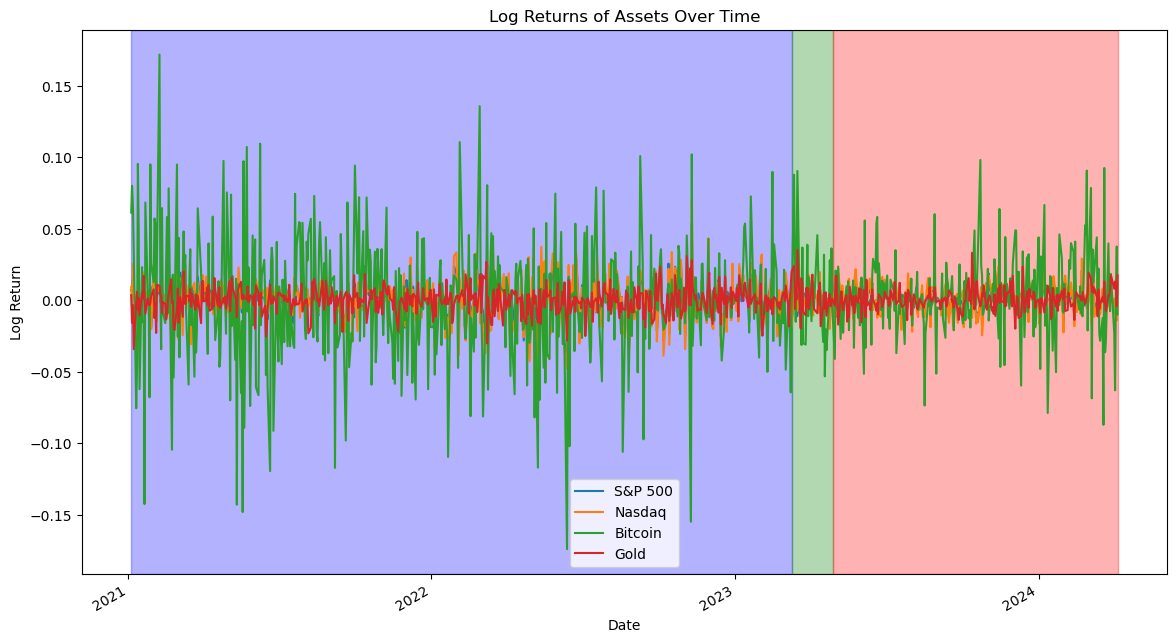

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



# 确保日期是Datetime类型，并设置为索引
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# 步骤2: 处理数据
# 已按日期排序并设置索引

# 步骤3: 绘制图表
plt.figure(figsize=(14, 8))
for column in data.columns:
    plt.plot(data.index, data[column], label=column)

# 步骤4: 划分区域
# 定义时间区间
periods = [
    ("2021-01-05", "2023-03-10", "blue"),
    ("2023-03-10", "2023-04-29", "green"),
    ("2023-04-29", "2024-04-05", "red"),
]

# 在图上为每个时间区间填充颜色
for start_date, end_date, color in periods:
    plt.axvspan(start_date, end_date, color=color, alpha=0.3)

# 添加图例和标题
plt.legend()
plt.title('Log Returns of Assets Over Time')
plt.xlabel('Date')
plt.ylabel('Log Return')

# 优化日期显示
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()  # 自动旋转日期标记

plt.show()

Pearson correlation coefficients

In [14]:



# Define the time periods for each panel
panels = {
    'Panel A': ('2021-01-05', '2023-03-10'),
    'Panel B': ('2023-03-10', '2023-04-29'),
    'Panel C': ('2023-04-29', '2024-04-05')
}

# Dictionary to hold correlation matrices for each panel
correlation_matrices = {}

# Calculate correlation matrix for each panel
for panel, (start_date, end_date) in panels.items():
    # Filter the data for the time period of the current panel
    panel_data = data.loc[start_date:end_date]
    # Calculate the Pearson correlation matrix
    correlation_matrix = panel_data.corr(method='pearson')
    # Store the correlation matrix in the dictionary
    correlation_matrices[panel] = correlation_matrix

# Now we have the correlation matrices for all panels, we can display them or use them further.
correlation_matrices['Panel A'], correlation_matrices['Panel B'], correlation_matrices['Panel C']

(          S&P 500    Nasdaq   Bitcoin      Gold
 S&P 500  1.000000  0.950867  0.427041  0.173772
 Nasdaq   0.950867  1.000000  0.445809  0.148008
 Bitcoin  0.427041  0.445809  1.000000  0.056324
 Gold     0.173772  0.148008  0.056324  1.000000,
           S&P 500    Nasdaq   Bitcoin      Gold
 S&P 500  1.000000  0.927684  0.101103 -0.480267
 Nasdaq   0.927684  1.000000  0.231875 -0.337838
 Bitcoin  0.101103  0.231875  1.000000  0.409684
 Gold    -0.480267 -0.337838  0.409684  1.000000,
           S&P 500    Nasdaq   Bitcoin      Gold
 S&P 500  1.000000  0.946653  0.109605  0.082792
 Nasdaq   0.946653  1.000000  0.114145  0.042664
 Bitcoin  0.109605  0.114145  1.000000  0.034341
 Gold     0.082792  0.042664  0.034341  1.000000)